In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Time scale separation of transcription and translation allows for us to make the simplfying assumption that transcription 
# is instantaneous relative to translation. Therefore, the ODEs below only take into account the protein concentrations of the 
# different components not their mRNA levels. 

The system of ODEs is given by:

\begin{align}
\frac{d[Activated Mod-OxyR]}{dt} &= k_1 \cdot [Mod-OxyR] \cdot [ROS] \\
\frac{d[Mod-OxyR]}{dt} &= k_2 + k_3 \cdot [Activated Mod-OxyR] - k_4 \cdot [CAT\_Inb] \\
\frac{d[CAT\_Inb]}{dt} &= k_5 \cdot [Activated Mod-OxyR] \\
\frac{d[ROS]}{dt} &= -k_6 \cdot [CAT\_Inb]
\end{align}


In [3]:
# AMO - Activated Mod-OxyR
# MO - Mod-OxyR
# CAT-Inb - Catalase fused to an Inhibitor domain
# ROS - Reactive oxygen species
# Define the system of ODEs
def system(conditions, t, k1, k2, k3, k4, k5, k6):
    AMO, MO, CAT_Inb, ROS = conditions
    
    # The ODEs
    dAMO_dt = k1 * MO * ROS
    dMO_dt = k2 + k3 * AMO - k4 * CAT_Inb 
    dCAT_Inb_dt = k5 * AMO
    dROS_dt = -k6 * CAT_Inb
    
    return [dAMO_dt, dMO_dt, dCAT_Inb_dt, dROS_dt]

In [4]:
# Initial conditions for AMO, MO, CAT_Inb, ROS

# play around by modifying the beginning concentrations
initial_conditions = [0, 1, 0, 10]  # Initial concentrations


# Rate constants
# controlling k2 and k4 is very important
# k2 control the basal rate of Mod-OxyR production
# k4 influences the concentration at which CAT can inhibit MO production

# play around by modifying the below constants!
k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.1
k5 = 0.1
k6 = 0.1

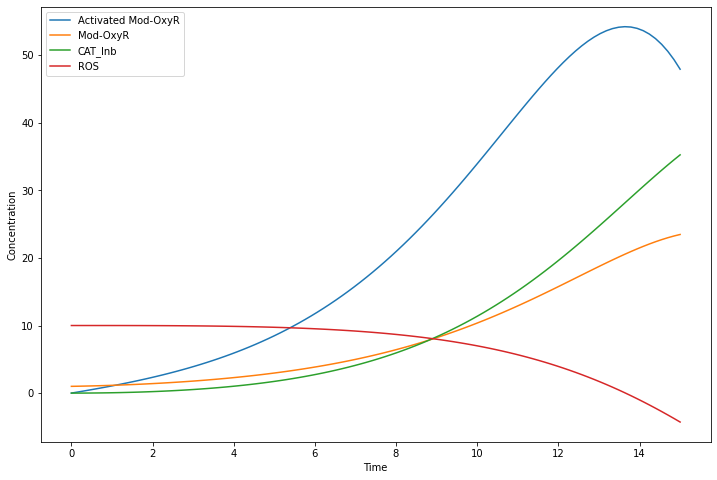

In [5]:
# Time vector
t = np.linspace(0, 15, 100)  # Simulate for 10 units of time, 100 points

# Solve ODEs
solution = odeint(system, initial_conditions, t, args=(k1, k2, k3, k4, k5, k6))

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t, solution[:, 0], label='Activated Mod-OxyR')
plt.plot(t, solution[:, 1], label='Mod-OxyR')
plt.plot(t, solution[:, 2], label='CAT_Inb')
plt.plot(t, solution[:, 3], label='ROS')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('')
plt.legend()
plt.show()
